In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
d=pd.read_csv('cardio_train.csv',sep=';')
d.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
5,995,21143,1,164,61.0,100,70,1,1,0,0,1,0
6,996,18085,1,162,72.0,100,70,1,1,0,0,1,0
7,997,22547,1,161,93.0,140,90,2,1,0,0,1,1
8,999,21250,1,157,68.0,110,80,1,1,0,0,1,0
9,1000,22446,1,158,65.0,140,90,3,1,0,0,1,1


In [3]:
d['age']=d['age']//365   # since Age is measured in days
d.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,61,1,155,69.0,130,80,2,2,0,0,1,0
1,989,40,1,163,71.0,110,70,1,1,0,0,1,1
2,990,60,1,165,70.0,120,80,1,1,0,0,1,0
3,991,39,2,165,85.0,120,80,1,1,1,1,1,0
4,992,64,1,155,62.0,120,80,1,1,0,0,1,0
5,995,57,1,164,61.0,100,70,1,1,0,0,1,0
6,996,49,1,162,72.0,100,70,1,1,0,0,1,0
7,997,61,1,161,93.0,140,90,2,1,0,0,1,1
8,999,58,1,157,68.0,110,80,1,1,0,0,1,0
9,1000,61,1,158,65.0,140,90,3,1,0,0,1,1


In [4]:
print('ap_hi max: ',d['ap_hi'].max())
print('ap_hi min: ',d['ap_hi'].min())
print('ap_lo max: ',d['ap_lo'].max())
print('ap_lo min: ',d['ap_lo'].min())

ap_hi max:  16020
ap_hi min:  -150
ap_lo max:  11000
ap_lo min:  -70


## To understand all our variables, at first, we should look at their datatype with info()

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


#All features are numerical, 12 integers and 1 decimal number (weight). 


#The second column gives us an idea how big is the dataset and how many non-null values are there for each field.


## We can use describe() to display sample statistics such as min, max, mean,std for each attribute:

In [6]:
d.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,52.840681,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,6.766685,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
d.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
d.shape

(69301, 13)

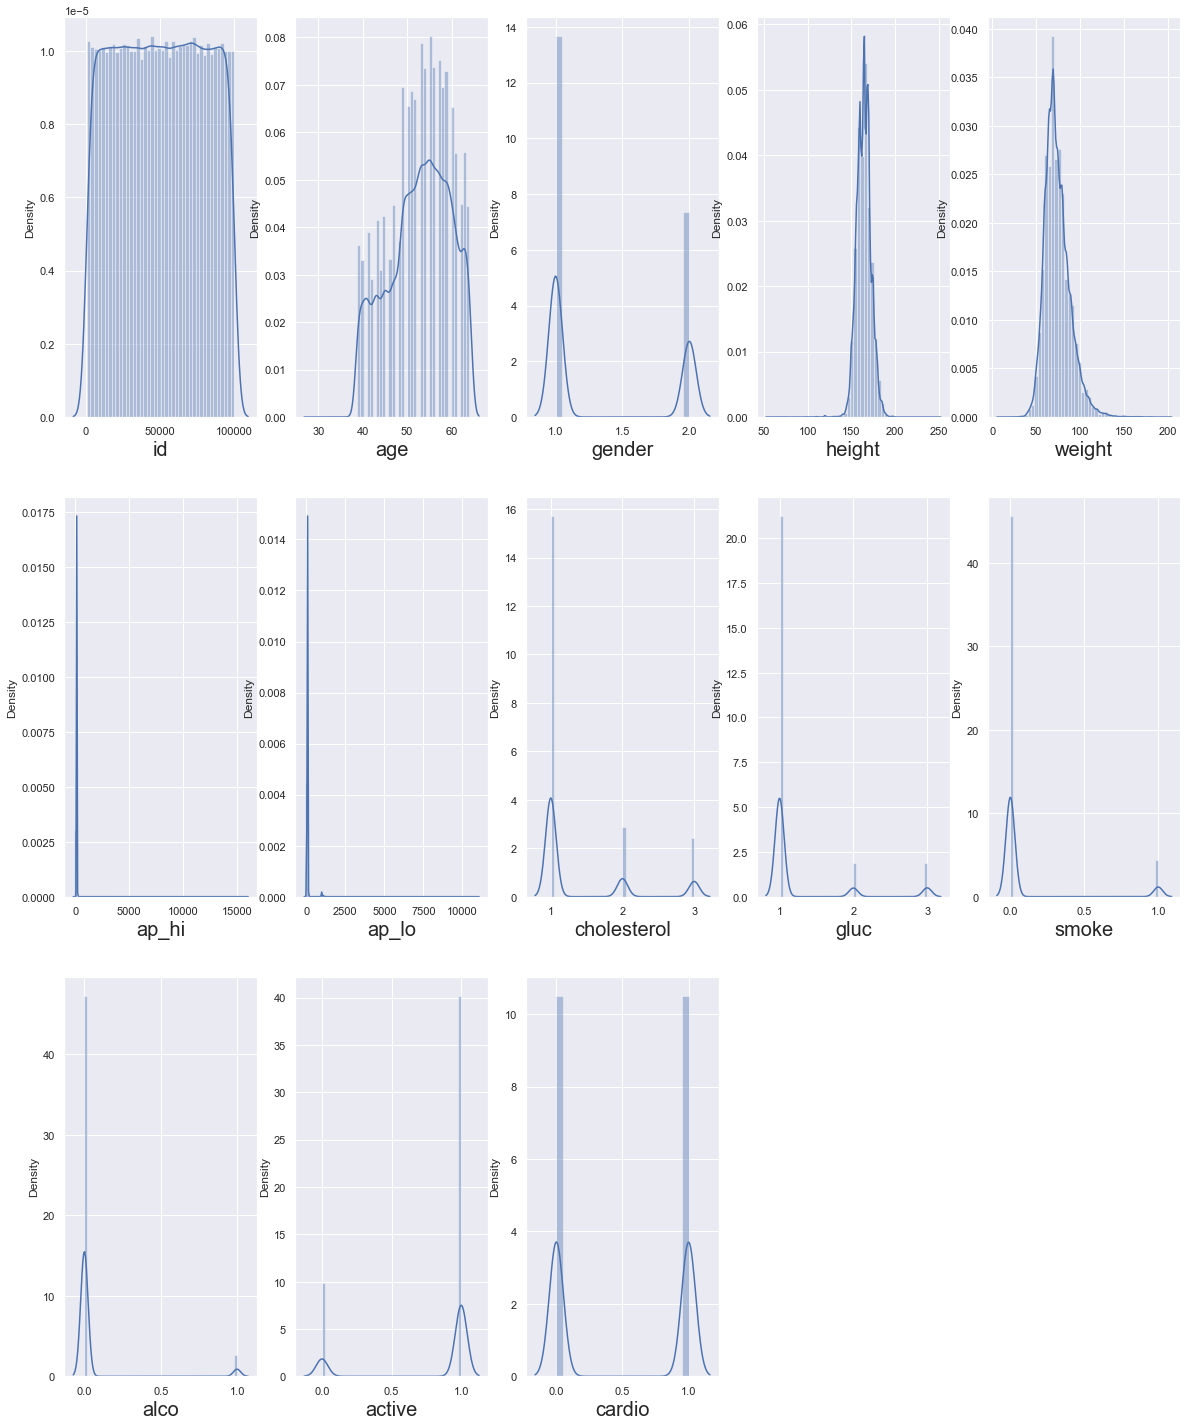

In [9]:
# analyse ie.//RESEARCH

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in d:
    if plotnumber<=13 :     # as there are 13 columns in the data
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot(d[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:>

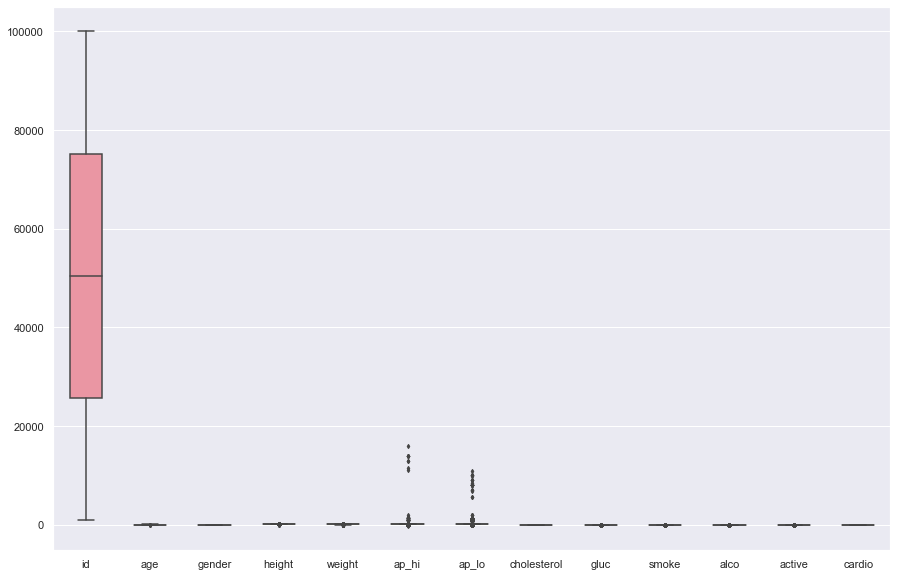

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=d, width= 0.5,ax=ax,  fliersize=3)

In [11]:
X = d.drop(columns = ['cardio'])
y = d['cardio']

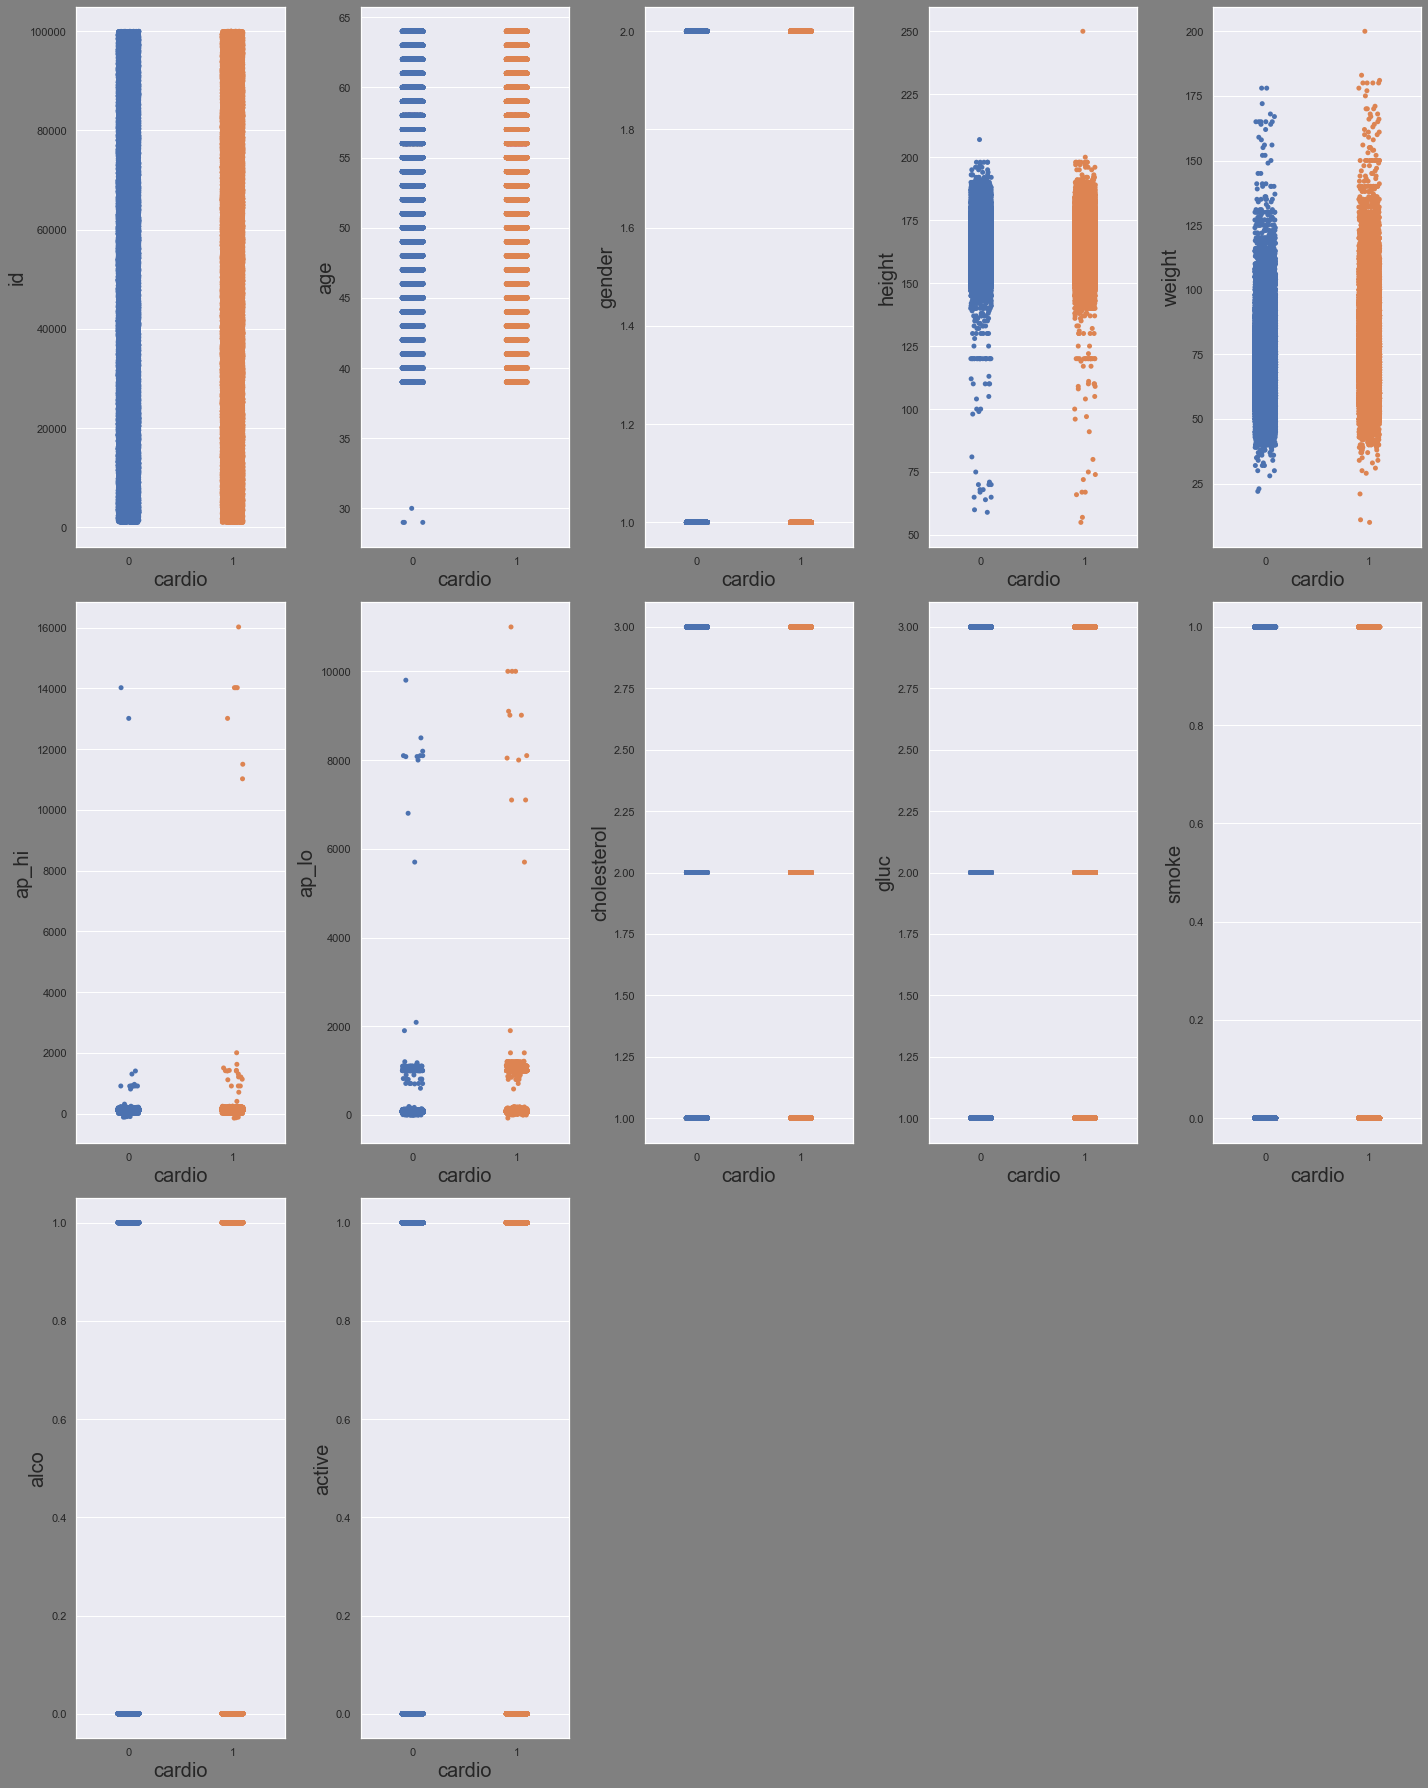

In [12]:
plt.figure(figsize=(20,25), facecolor='grey')
plotnumber = 1

for column in X:
    if plotnumber<=13:
        ax = plt.subplot(3,5,plotnumber)
        g=sns.stripplot(y,X[column])
        g.set_xlabel('cardio',fontsize=20)
        g.set_ylabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [13]:
q = d['ap_lo'].quantile(0.98)
data_cleaned = d[d['ap_lo']<q]

q = data_cleaned['ap_hi'].quantile(0.995)
data_cleaned  = data_cleaned[data_cleaned['ap_hi']<q]


<AxesSubplot:>

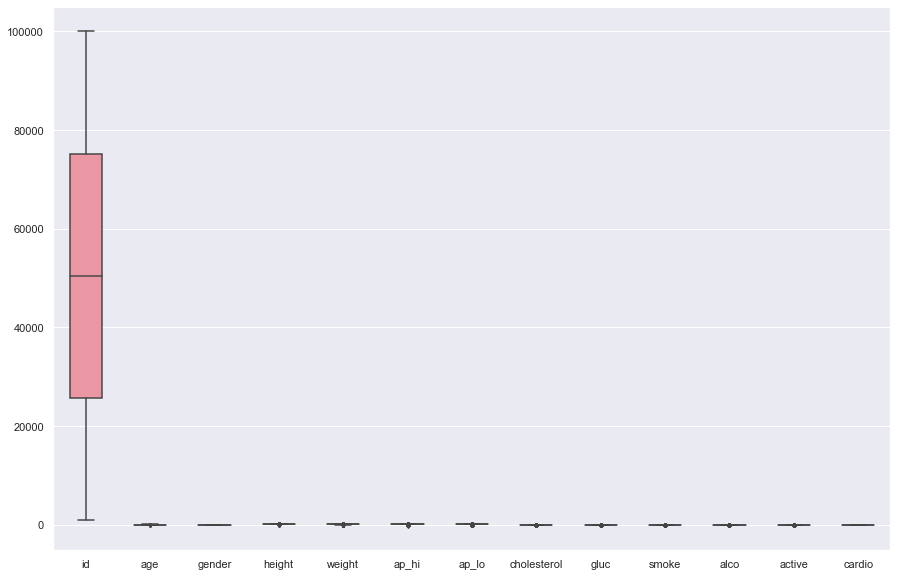

In [14]:
# to display the cleaned data

fig, ax = plt.subplots(figsize=(15,10))  
sns.boxplot(data=data_cleaned, width= 0.5,ax=ax,  fliersize=3)  # use data=data_cleaned

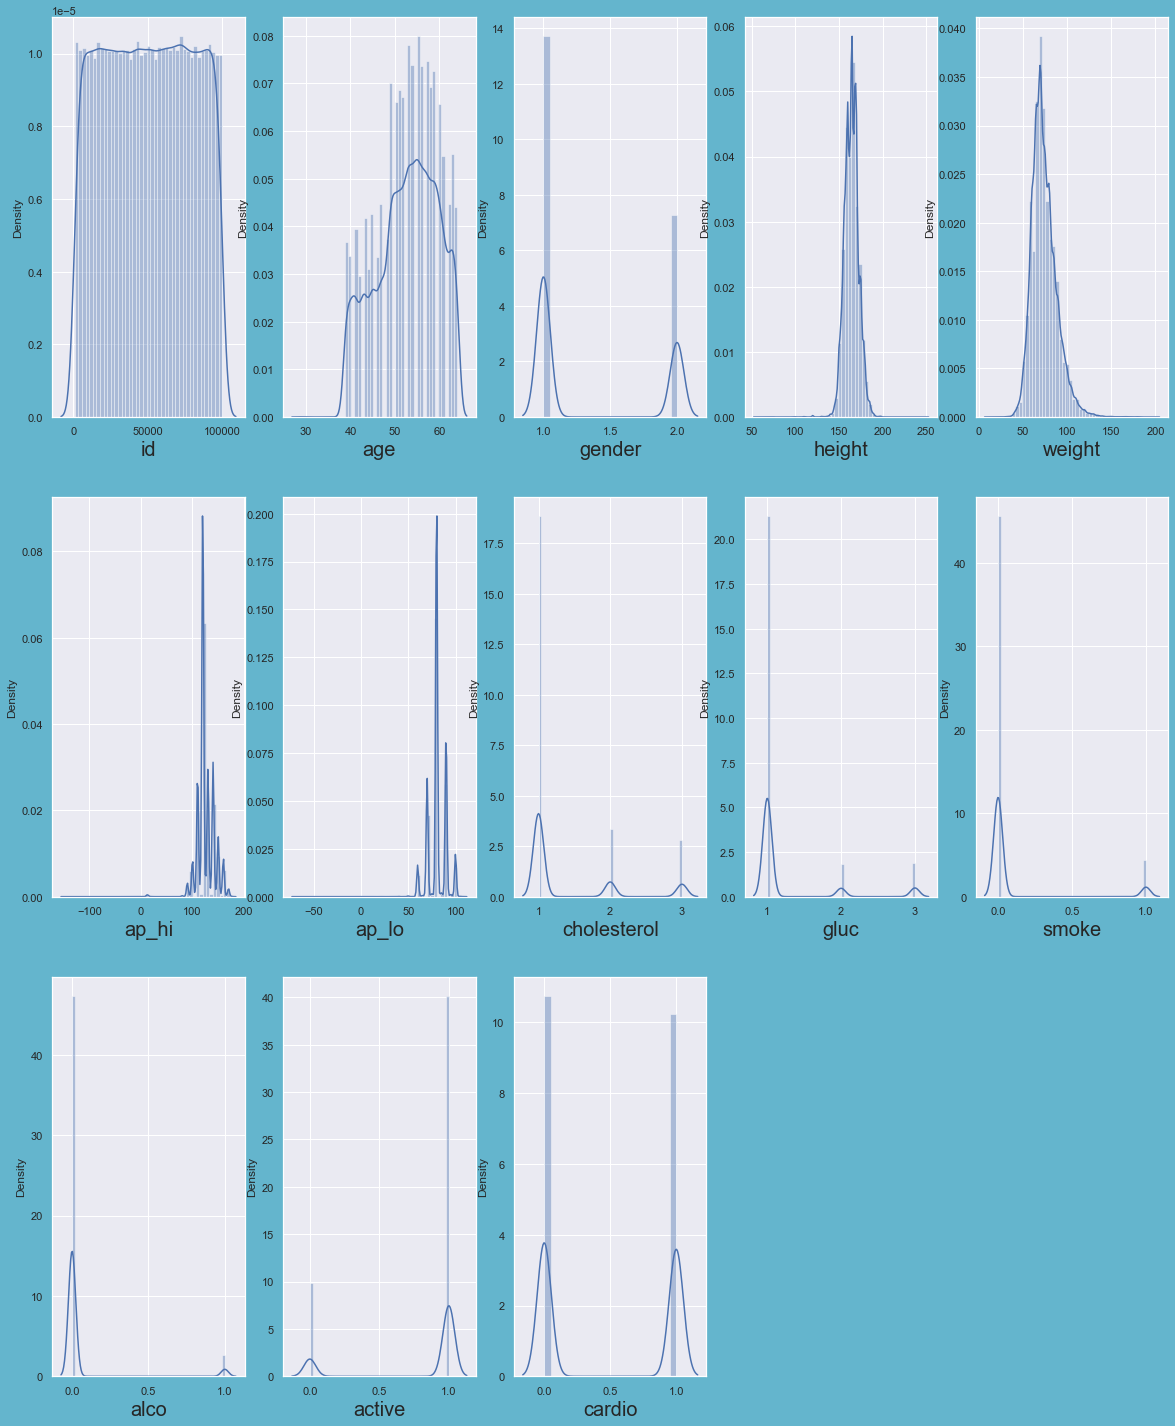

In [15]:
plt.figure(figsize=(20,25), facecolor='c')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=13 :     # as there are 13 columns in the data
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [16]:
X = data_cleaned.drop(columns = ['cardio'])
y = data_cleaned['cardio']

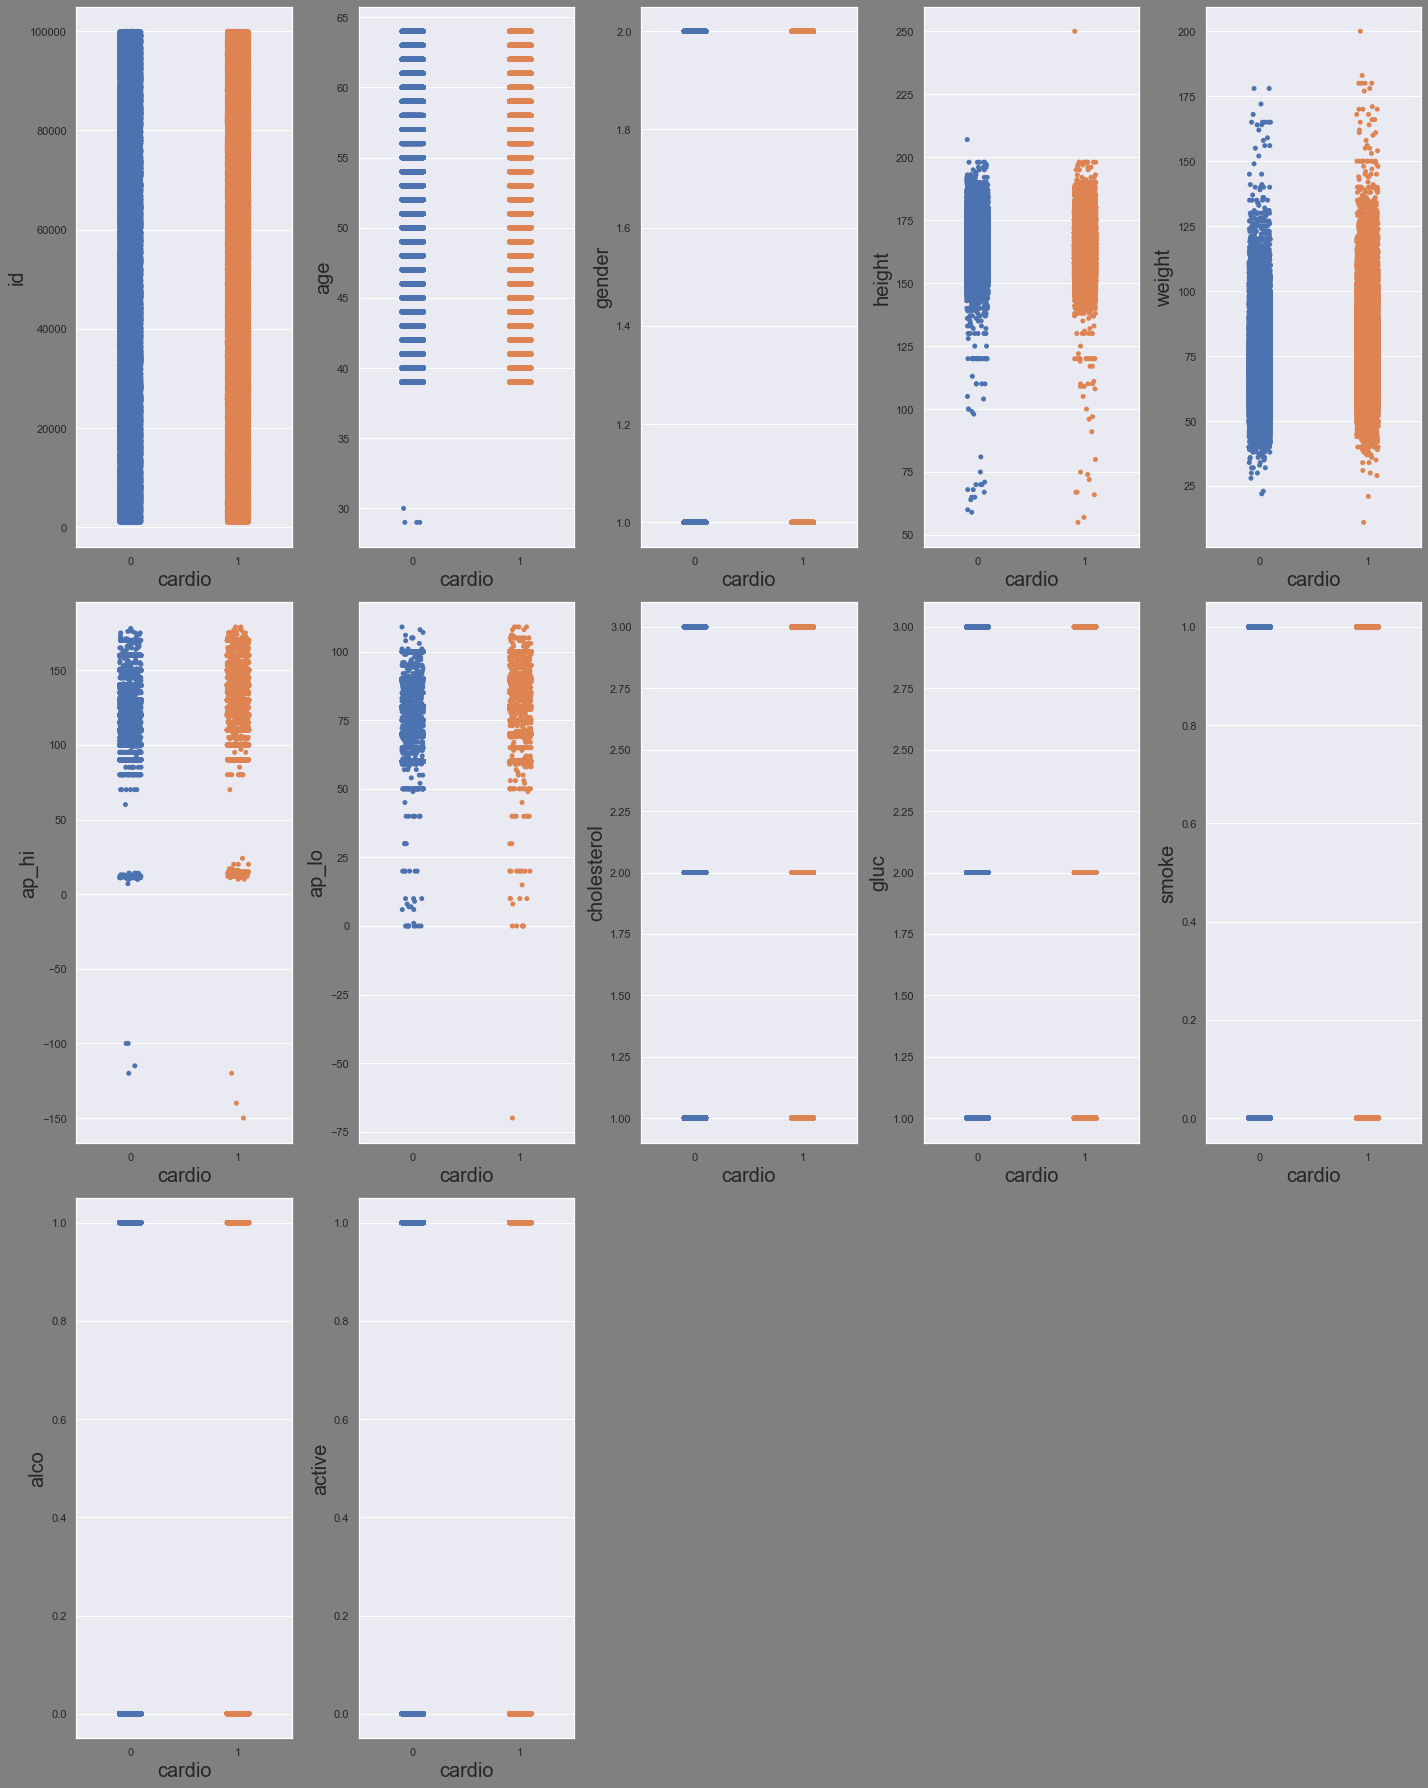

In [17]:
plt.figure(figsize=(20,25), facecolor='grey')
plotnumber = 1

for column in X:
    if plotnumber<=13:
        ax = plt.subplot(3,5,plotnumber)
        g=sns.stripplot(y,X[column])
        g.set_xlabel('cardio',fontsize=20)
        g.set_ylabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [18]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(x)

In [19]:
X_scaled

array([[-1.73194588,  1.21102645, -0.72921852, ..., -0.30889052,
        -0.23617558,  0.49415053],
       [-1.73191088, -1.88787937, -0.72921852, ..., -0.30889052,
        -0.23617558,  0.49415053],
       [-1.73187588,  1.0634595 , -0.72921852, ..., -0.30889052,
        -0.23617558,  0.49415053],
       ...,
       [ 1.73325298,  1.21102645, -0.72921852, ..., -0.30889052,
        -0.23617558,  0.49415053],
       [ 1.73335798,  1.21102645, -0.72921852, ..., -0.30889052,
        -0.23617558, -2.02367483],
       [ 1.73339298,  0.47319173, -0.72921852, ..., -0.30889052,
        -0.23617558,  0.49415053]])

In [20]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

In [21]:
vif

,vif,Features
0,1.000133,id
1,1.069960,age
2,1.454908,gender
3,1.438435,height
4,1.200380,weight
5,1.813262,ap_hi
6,1.764870,ap_lo
7,1.313811,cholesterol
8,1.257880,gluc
9,1.247652,smoke


In [22]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.20, random_state = 255)

In [23]:
reg = LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [24]:
y_pred = reg.predict(x_test)

In [25]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7258473943556817

In [26]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[5476, 1421],
       [2251, 4246]], dtype=int64)

In [27]:
true_positive = cm[0][0]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_negative = cm[1][1]

In [28]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7258473943556817

In [29]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.7939683920545164

In [30]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.7086838359000905

In [31]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.74890590809628

In [32]:
auc = roc_auc_score(y_test, y_pred)
auc

0.7237503958117741

In [33]:
fpr,tpr, thresholds = roc_curve(y_test, y_pred)

In [34]:
print('fpr: ',fpr)
print('tpr: ',tpr)
print('thresholds: ',thresholds)

fpr:  [0.         0.20603161 1.        ]
tpr:  [0.        0.6535324 1.       ]
thresholds:  [2 1 0]


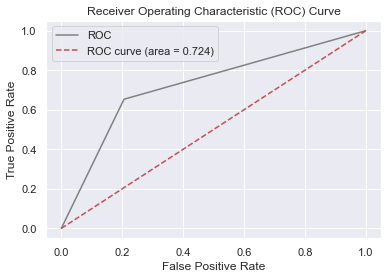

In [35]:
plt.plot(fpr, tpr, color='grey', label='ROC')
plt.plot([0, 1], [0, 1], color='r', linestyle='--',label='ROC curve (area = %0.3f)'% auc )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# tunning to get best accuracy

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid={'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
           'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
           'multi_class' : ['auto', 'ovr', 'multinomial']}

In [53]:
g_s=GridSearchCV(reg,param_grid,verbose=3,n_jobs=-1)

In [54]:
g_s.fit(x_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=3)

In [55]:
g_s.best_params_

{'multi_class': 'multinomial', 'penalty': 'none', 'solver': 'sag'}

In [56]:
lr=LogisticRegression(multi_class= 'multinomial', penalty= 'none', solver= 'sag')

In [57]:
lr.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial', penalty='none', solver='sag')

In [58]:
y_pred = lr.predict(x_test)

In [59]:
accuracy_a = accuracy_score(y_test,y_pred)
accuracy_a

0.7258473943556817